# Lezione 07

In questa lezione ci proponiamo di simulare i sistemi di Argon e Kripton della lezione 04 utilizzando il metodo Monte Carlo.
Le stime di $U$ e $P$ negli stati solido, liquido e gassoso si ottengono con medie Monte Carlo di valori istantanei, calcolati su configurazioni del sistema ottenute campionando la densità $\rho _B(\{s_i\}) = e^{-\beta H}/Z$, dove $H = \sum_i mv_i^2/2 + \sum_{i,j} u_{ij}$ e $u_{ij}$ potenziale di Lennard-Jones.

## Lunghezza di correlazione
### Stato solido

Stampando configurazioni instantanee di $U$ e $P$ osservo quanti time step sono necessari perchè l'andamento di queste osservabili si stabilizzi attorno a un valore costante; in questo modo trovo il tempo di equilibrazione.
Per lo stato solido ho traovato che $t_{eq}=100$ è un buon tempo di equilibrazione e settando $\delta = 0.12$ l'accettanza è intorno al $50\%$.

Per determinare la lungezza di correlazione calcolo $ AcU(\tau)=\langle U_t\cdot U_{t+\tau} \rangle_{\text{traj}} - \langle U_t \rangle_{\text{traj}} \langle U_{t+\tau} \rangle_{\text{traj}}$ e $AcP(\tau)=\langle P_t\cdot P_{t+\tau} \rangle - \langle P_t \rangle \langle P_{t+\tau} \rangle$ con $t$ un tempo successivo all'equilibrazione. Le medie sono eseguite su 60 simulazioni. Fittando $AcU(\tau)$ e $AcP(\tau)$ con $ae^{-\tau/l}+b$ si trova la lunghezza di correlazione $l$.  
Di seguito gli andamenti di $AcU(\tau)$ e $AcP(\tau)$ nel caso dello stato solido.

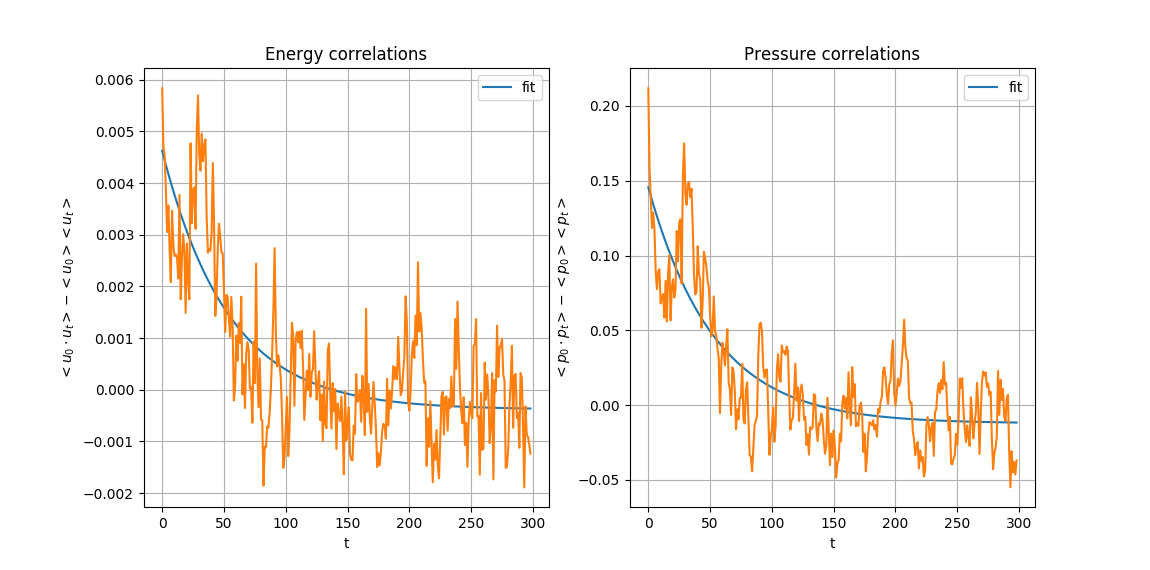

In [1]:
from IPython.display import Image
i = Image(filename = 'corr_solid.png') 
i

Trovo $l_U=53.56\pm5.72$ e $l_P=53.21\pm5.05$. Scelgo come dimensione dei blocchi 500 time step.



### Stato liquido

Per lo stato liquido pongo $t_{eq}= 500$ e $\delta = 0.2$. Come nel caso precedente determino la lunghezza di correlazione osservando l'andamento di $AcU$ e $AcP$. 

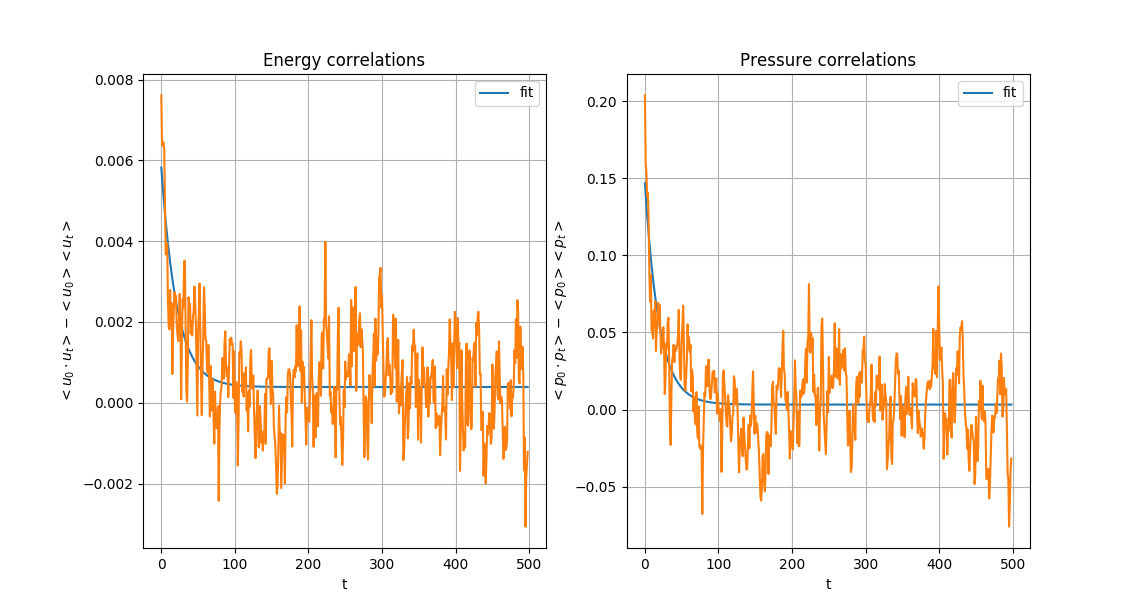

In [3]:
from IPython.display import Image
i = Image(filename = 'corr_liquid.png') 
i

In questo caso $l_U= 21.17\pm2.64$ e $l_P= 19.38\pm2.20$. Anche in questo caso scelgo come dimensione dei blocchi 500 time step. 

### Stato gassoso

In questo caso pongo $t_{eq}=100$ e fissando $\delta = 3$ ottengo un'accettanza di circa il $60\%$. Per le correlazioni ottengo:

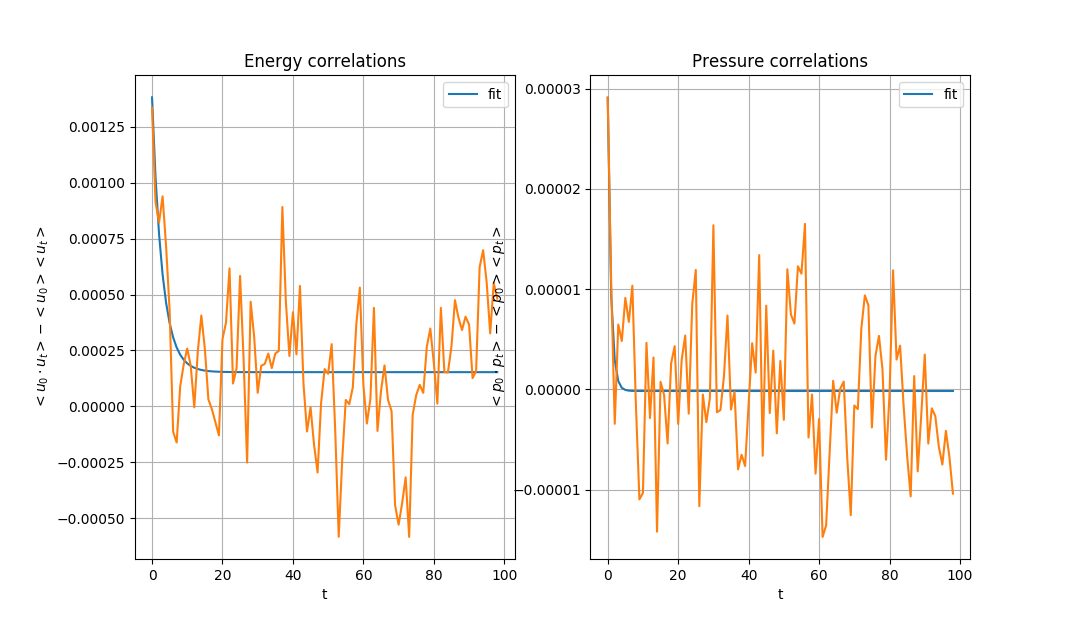

In [4]:
from IPython.display import Image
i = Image(filename = 'corr_gas.png') 
i

Questa volta $l_U=2.90\pm0.99$ e $l_P=0.89\pm0.50$. Pongo la dimensione dei blocchi uguale a 100 time step.

Per gli stati solido e liquido utilizzo 100 blocchi da 500 time step, per lo stato gassoso 500 blocchi da 100 time step in modo da generare $5\cdot 10^4$ configurazioni in tutti i casi. 

## Andamento dell'errore con la dimensione dei blocchi

Ora osserviamo come varia l'incertezza sulle stime finali di $U/N$ e $P$ con la dimensione dei blocchi utilizzata nel datablock. Ho eseguito 30 simulazioni, inizializzando l'oggetto Random in modo differente, in cui vengono stampati sullo stesso file (up_solid.dat per lo stato solido ecc.) $10^4$ valori istantanei di $U/N$ e $P$ per ogni simulazione. Lo script seguente legge il file e per i dati di ciasuna simulazione calcola l'errore finale sulla stima di $U/N$ e $P$ in funzione della dimensione dei blocchi $L$, per alcuni valori di $L$. Alla fine questi risultati vengono mediati sulle diverse simulazioni. Queste operazioni sono state eseguite per gli stati solido liquido e gassoso. Di seguito l'andamento ottenuto nel caso dello stato solido:

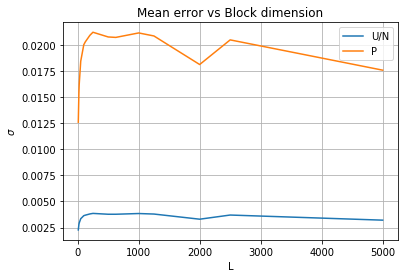

max error at L= 250 and 250


In [11]:
# SOLID STATE

import matplotlib.pyplot as plt
import numpy as np

u, p = np.loadtxt("up_solid.dat", usecols=(0,1), unpack=True)
L = np.array([10,20,25,50,100,125,200,250,500,625,1000,1250, 2000,2500,5000])
Ntot = 10000 #per sim

nsim = int(len(u)/Ntot)
u = np.reshape(u, (nsim,Ntot)) 
p = np.reshape(p, (nsim,Ntot))

def Err(x,l,Ntot):
   Nblk = Ntot/l
   glob_ave = 0
   glob_ave2 = 0
   for i in range(int(Nblk)):
      sum = 0
      for j in range(l):
         k=j+i*l
         sum += x[k]

      glob_ave += sum/l
      glob_ave2 += (sum/l)**2
   
   glob_ave /= Nblk 
   glob_ave2 /= Nblk
   return np.sqrt( (glob_ave2 - glob_ave**2)/(Nblk-1) )


erru = np.zeros(len(L))
errp = np.zeros(len(L))

for k in range(nsim):
   for l in range(len(L)):
      erru[l] += Err(u[k,:],L[l],Ntot)
      errp[l] += Err(p[k,:],L[l],Ntot)

erru = erru/nsim
errp = errp/nsim

plt.plot(L,erru, label='U/N')
plt.plot(L,errp, label='P')
plt.legend()
plt.grid(True)
plt.title("Mean error vs Block dimension")
plt.xlabel('L')
plt.ylabel('$\sigma$')
plt.show()
indmaxu = np.argmax(erru)
indmaxp = np.argmax(errp)
print("max error at L= "+str(L[indmaxu])+" and "+str(L[indmaxp]))

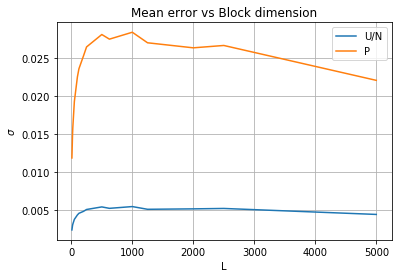

max error at L= 1000 and 1000


In [9]:
# LIQUID STATE

u, p = np.loadtxt("up_liquid.dat", usecols=(0,1), unpack=True)
u = np.reshape(u, (nsim,Ntot)) 
p = np.reshape(p, (nsim,Ntot))
erru = np.zeros(len(L))
errp = np.zeros(len(L))

for k in range(nsim):
   for l in range(len(L)):
      erru[l] += Err(u[k,:],L[l],Ntot)
      errp[l] += Err(p[k,:],L[l],Ntot)

erru = erru/nsim
errp = errp/nsim

plt.plot(L,erru, label='U/N')
plt.plot(L,errp, label='P')
plt.legend()
plt.grid(True)
plt.title("Mean error vs Block dimension")
plt.xlabel('L')
plt.ylabel('$\sigma$')
plt.show()
indmaxu = np.argmax(erru)
indmaxp = np.argmax(errp)
print("max error at L= "+str(L[indmaxu])+" and "+str(L[indmaxp]))

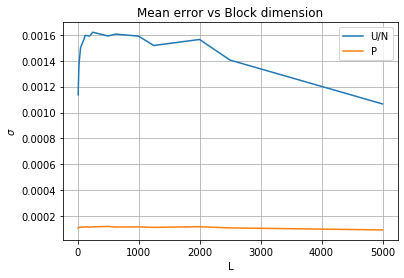

max error at L= 250 and 500


In [8]:
# GASEOUS STATE

u, p = np.loadtxt("up_gas.dat", usecols=(0,1), unpack=True)
u = np.reshape(u, (nsim,Ntot)) 
p = np.reshape(p, (nsim,Ntot))
erru = np.zeros(len(L))
errp = np.zeros(len(L))

for k in range(nsim):
   for l in range(len(L)):
      erru[l] += Err(u[k,:],L[l],Ntot)
      errp[l] += Err(p[k,:],L[l],Ntot)

erru = erru/nsim
errp = errp/nsim

plt.plot(L,erru, label='U/N')
plt.plot(L,errp, label='P')
plt.legend()
plt.grid(True)
plt.title("Mean error vs Block dimension")
plt.xlabel('L')
plt.ylabel('$\sigma$')
plt.show()
indmaxu = np.argmax(erru)
indmaxp = np.argmax(errp)
print("max error at L= "+str(L[indmaxu])+" and "+str(L[indmaxp]))

In tutti i casi osserviamo che l'incertezza aumenta con la dimensione dei blocchi per un breve intervallo e, una volta raggiunto il massimo, diminuisce lentamente con l'aumentare della dimensione dei blocchi.

## Stima di g(r)

Ora eseguiamo una stima della funzione $g(r)$ utilizzando sia il metodo Monte Carlo (Monte_Carlo_NVT.cpp) sia una simulazione di Dinamica Molecolare (MolDyn_NVE.cpp). La stima viene eseguita per i sistemi di Argon e di Kripton della lezione 04 negli stati solido liquido e gassoso. Nella figura seguente troviamo i risultati messi a confronto.

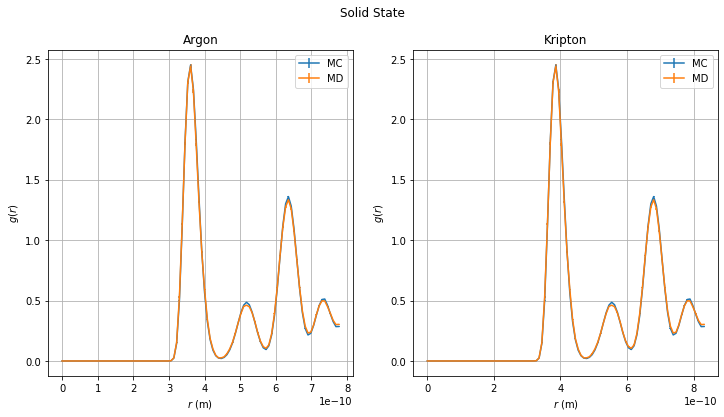

In [17]:
import numpy as np
import matplotlib.pyplot as plt


kb = 1.380649*(10**(-23))
amu = 1.66054*(10**(-27))

sigAr = 0.34*(10**(-9))
epsAr = 120*kb
mAr = 39.948*amu

sigKr = 0.364*(10**(-9))
epsKr = 164*kb
mKr = 83.798*amu

#solid state
r, g, errg = np.loadtxt("gr_solid.dat", usecols=(0,1,2), unpack = True)
r_md, g_md, errg_md = np.loadtxt("gdir_solid.dat", usecols=(0,1,2), unpack = True)

rAr = r*sigAr
rAr_md = r_md*sigAr 
rKr = r_md*sigKr
rKr_md = r_md*sigKr

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.errorbar(rAr,g,yerr=errg,label="MC")
plt.errorbar(rAr_md,g_md,yerr=errg_md,label="MD")
plt.legend()
plt.grid(True)
plt.xlabel('$r$ (m)') 
plt.ylabel('$g(r)$')
plt.title("Argon")

plt.subplot(122)
plt.errorbar(rKr,g,yerr=errg,label="MC")
plt.errorbar(rKr_md,g_md,yerr=errg_md,label="MD")
plt.legend()
plt.grid(True)
plt.xlabel('$r$ (m)') 
plt.ylabel('$g(r)$')
plt.title("Kripton")

plt.suptitle("Solid State")
plt.show()

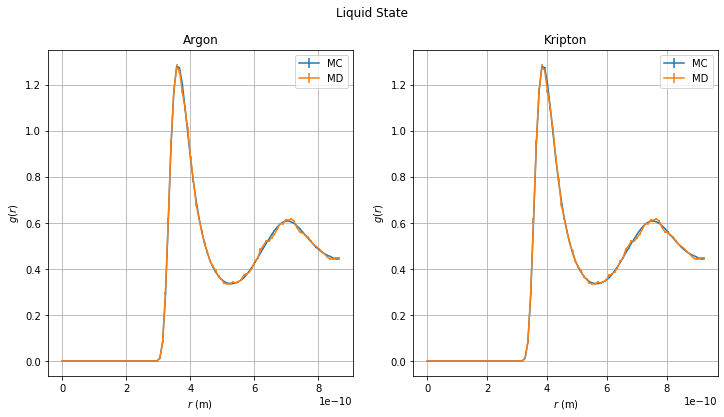

In [19]:
#liquid state
r, g, errg = np.loadtxt("gr_liquid.dat", usecols=(0,1,2), unpack = True)
r_md, g_md, errg_md = np.loadtxt("gdir_liquid.dat", usecols=(0,1,2), unpack = True)

rAr = r*sigAr
rAr_md = r_md*sigAr 
rKr = r_md*sigKr
rKr_md = r_md*sigKr

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.errorbar(rAr,g,yerr=errg,label="MC")
plt.errorbar(rAr_md,g_md,yerr=errg_md,label="MD")
plt.legend()
plt.grid(True)
plt.xlabel('$r$ (m)') 
plt.ylabel('$g(r)$')
plt.title("Argon")

plt.subplot(122)
plt.errorbar(rKr,g,yerr=errg,label="MC")
plt.errorbar(rKr_md,g_md,yerr=errg_md,label="MD")
plt.legend()
plt.grid(True)
plt.xlabel('$r$ (m)') 
plt.ylabel('$g(r)$')
plt.title("Kripton")

plt.suptitle("Liquid State")
plt.show()

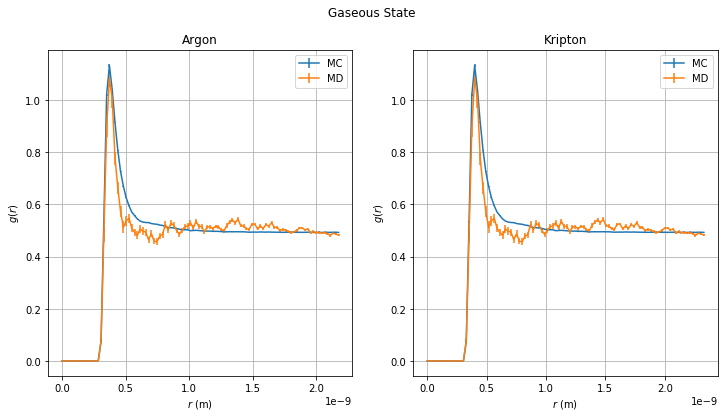

In [20]:
#gaseous state
r, g, errg = np.loadtxt("gr_gas.dat", usecols=(0,1,2), unpack = True)
r_md, g_md, errg_md = np.loadtxt("gdir_gas.dat", usecols=(0,1,2), unpack = True)

rAr = r*sigAr
rAr_md = r_md*sigAr 
rKr = r_md*sigKr
rKr_md = r_md*sigKr

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.errorbar(rAr,g,yerr=errg,label="MC")
plt.errorbar(rAr_md,g_md,yerr=errg_md,label="MD")
plt.legend()
plt.grid(True)
plt.xlabel('$r$ (m)') 
plt.ylabel('$g(r)$')
plt.title("Argon")

plt.subplot(122)
plt.errorbar(rKr,g,yerr=errg,label="MC")
plt.errorbar(rKr_md,g_md,yerr=errg_md,label="MD")
plt.legend()
plt.grid(True)
plt.xlabel('$r$ (m)') 
plt.ylabel('$g(r)$')
plt.title("Kripton")

plt.suptitle("Gaseous State")
plt.show()

Osservimo che c'è un buon accordo tra i risultati ottenuti coi due metodi.

## Stime di $U/N$ e $P$ 

Riporitamo ora le stime di $U/N$ e $P$ ottenute con il metodo Monte Carlo.

### Stato gassoso

#### U/N

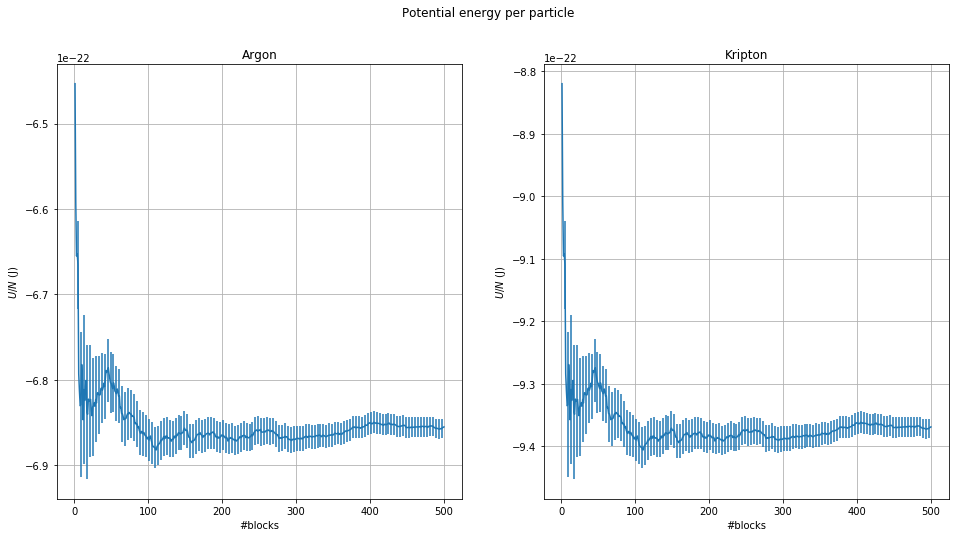

In [4]:
import numpy as np
import matplotlib.pyplot as plt

kb = 1.380649*(10**(-23))
amu = 1.66054*(10**(-27))

sigAr = 0.34*(10**(-9))
epsAr = 120*kb
mAr = 39.948*amu

sigKr = 0.364*(10**(-9))
epsKr = 164*kb
mKr = 83.798*amu

#Potential energy

Nblocks, U, errU = np.loadtxt("pot_gas_MC.dat", usecols=(0,2,3), unpack=True)

U_Ar = U*epsAr
errU_Ar = errU*epsAr

U_Kr = U*epsKr
errU_Kr = errU*epsKr

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,U_Ar, yerr=errU_Ar, errorevery=4)
plt.xlabel('#blocks')
plt.ylabel('$U/N$ (J)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,U_Kr, yerr=errU_Kr, errorevery=4)
plt.xlabel('#blocks')
plt.ylabel('$U/N$ (J)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Potential energy per particle')
plt.show()

#### P

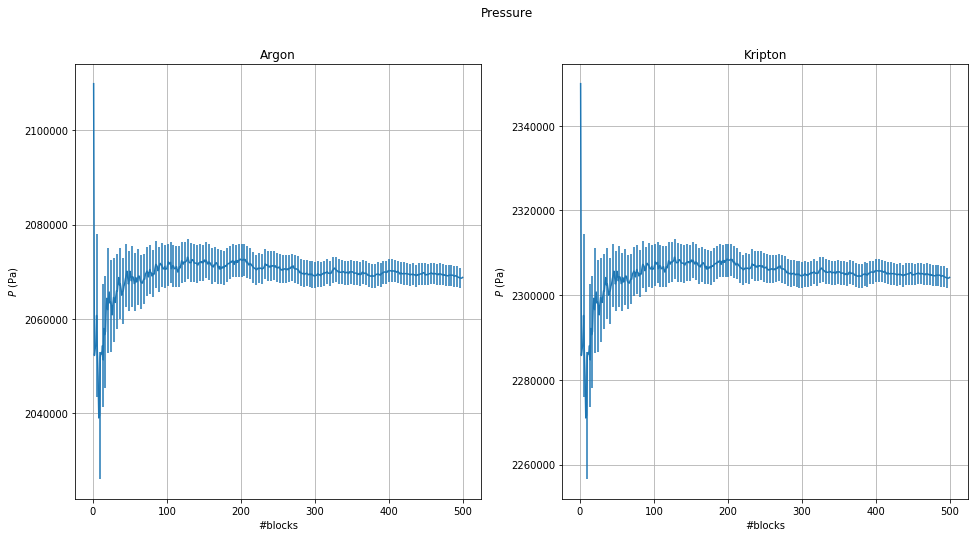

In [7]:
#Pressure

Nblocks, P, errP = np.loadtxt("pre_gas_MC.dat", usecols=(0,2,3), unpack=True)

P_Ar = P*epsAr/sigAr**3
errP_Ar = errP*epsAr/sigAr**3

P_Kr = P*epsKr/sigKr**3
errP_Kr = errP*epsKr/sigKr**3

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,P_Ar, yerr=errP_Ar, errorevery=4)
plt.xlabel('#blocks')
plt.ylabel('$P$ (Pa)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,P_Kr, yerr=errP_Kr, errorevery=4)
plt.xlabel('#blocks')
plt.ylabel('$P$ (Pa)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Pressure')
plt.show()

### Stato liquido

#### U/N

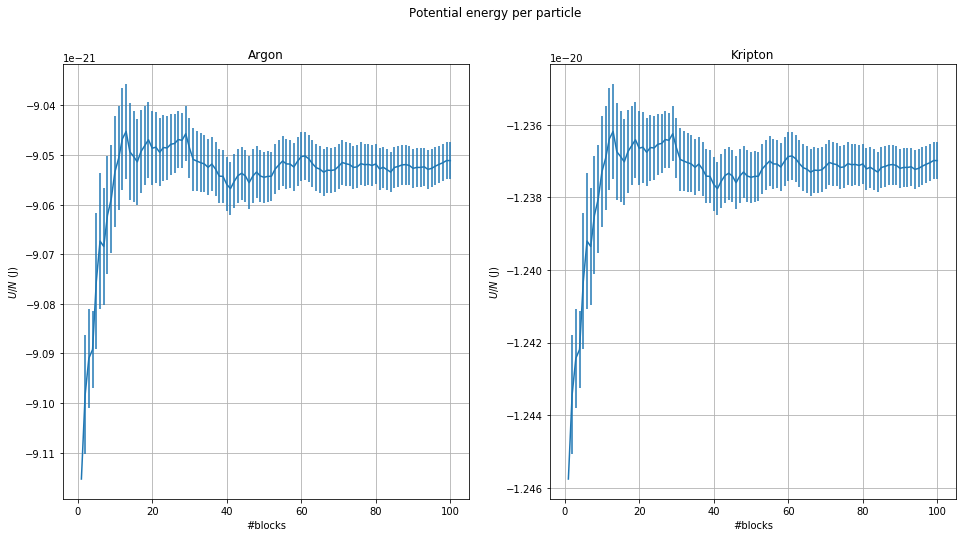

In [9]:
#Potential energy

Nblocks, U, errU = np.loadtxt("pot_liquid_MC.dat", usecols=(0,2,3), unpack=True)

U_Ar = U*epsAr
errU_Ar = errU*epsAr

U_Kr = U*epsKr
errU_Kr = errU*epsKr

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,U_Ar, yerr=errU_Ar)
plt.xlabel('#blocks')
plt.ylabel('$U/N$ (J)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,U_Kr, yerr=errU_Kr)
plt.xlabel('#blocks')
plt.ylabel('$U/N$ (J)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Potential energy per particle')
plt.show()

#### P

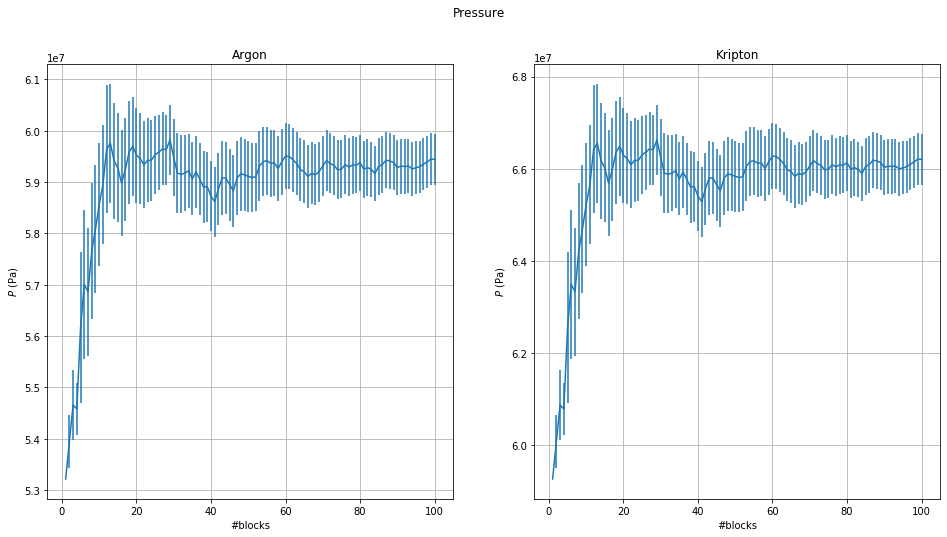

In [10]:
#Pressure

Nblocks, P, errP = np.loadtxt("pre_liquid_MC.dat", usecols=(0,2,3), unpack=True)

P_Ar = P*epsAr/sigAr**3
errP_Ar = errP*epsAr/sigAr**3

P_Kr = P*epsKr/sigKr**3
errP_Kr = errP*epsKr/sigKr**3

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,P_Ar, yerr=errP_Ar)
plt.xlabel('#blocks')
plt.ylabel('$P$ (Pa)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,P_Kr, yerr=errP_Kr)
plt.xlabel('#blocks')
plt.ylabel('$P$ (Pa)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Pressure')
plt.show()

### Stato solido

#### U/N

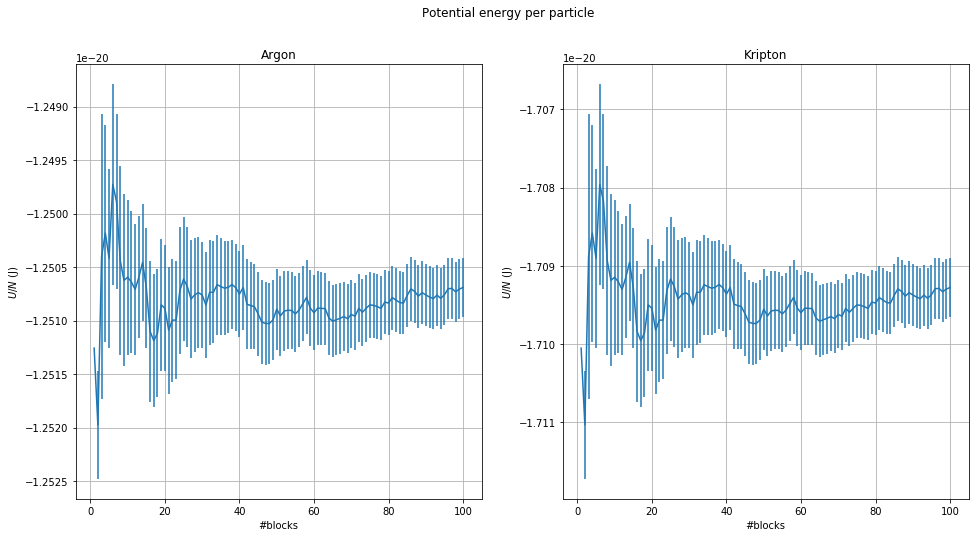

In [13]:
#Potential energy

Nblocks, U, errU = np.loadtxt("pot_solid_MC.dat", usecols=(0,2,3), unpack=True)

U_Ar = U*epsAr
errU_Ar = errU*epsAr

U_Kr = U*epsKr
errU_Kr = errU*epsKr

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,U_Ar, yerr=errU_Ar)
plt.xlabel('#blocks')
plt.ylabel('$U/N$ (J)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,U_Kr, yerr=errU_Kr)
plt.xlabel('#blocks')
plt.ylabel('$U/N$ (J)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Potential energy per particle')
plt.show()

#### P


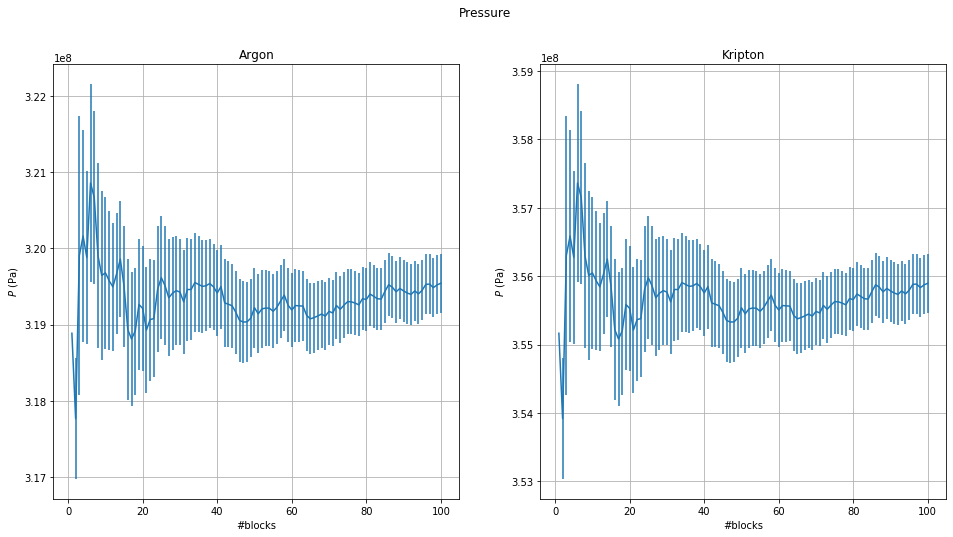

In [14]:
#Pressure

Nblocks, P, errP = np.loadtxt("pre_solid_MC.dat", usecols=(0,2,3), unpack=True)

P_Ar = P*epsAr/sigAr**3
errP_Ar = errP*epsAr/sigAr**3

P_Kr = P*epsKr/sigKr**3
errP_Kr = errP*epsKr/sigKr**3

plt.figure(figsize=(16,8))

plt.subplot(121)
plt.errorbar(Nblocks ,P_Ar, yerr=errP_Ar)
plt.xlabel('#blocks')
plt.ylabel('$P$ (Pa)')
plt.grid(True)
plt.title('Argon')

plt.subplot(122)
plt.errorbar(Nblocks ,P_Kr, yerr=errP_Kr)
plt.xlabel('#blocks')
plt.ylabel('$P$ (Pa)')
plt.grid(True)
plt.title('Kripton')


plt.suptitle('Pressure')
plt.show()

Queste stime sono in accordo con quelle trovate nella lezione 4. 